In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [2]:
# Configuración general para visualizaciones
sns.set(style='whitegrid', palette='pastel')
plt.rcParams['figure.dpi'] = 100

In [3]:
# Cargar y explorar datos
file_path = 'Mall_Customers.csv'
data = pd.read_csv(file_path)

In [4]:
print("\nVista inicial del dataset:")
display(data.head())
data.info()
print("\nEstadísticas descriptivas:")
display(data.describe())


Vista inicial del dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Estadísticas descriptivas:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


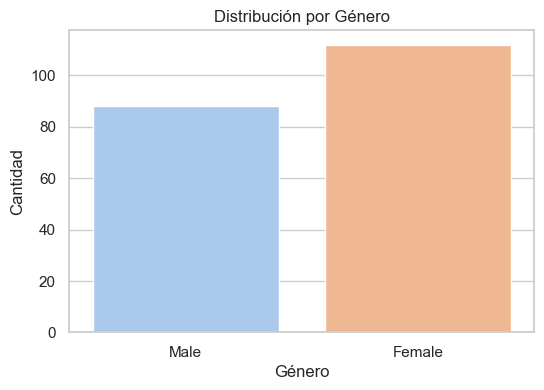

In [5]:
# Análisis exploratorio
# Distribución del género
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Gender', palette='pastel')
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

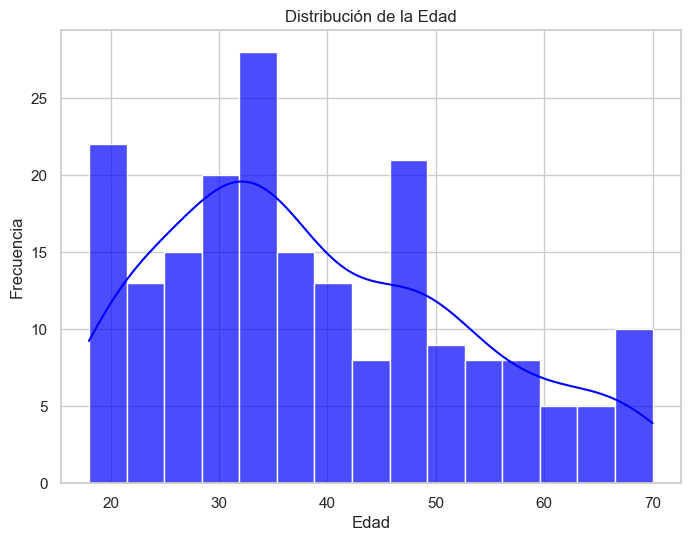

In [6]:
# Distribución de la edad
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True, bins=15, color='blue', alpha=0.7)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

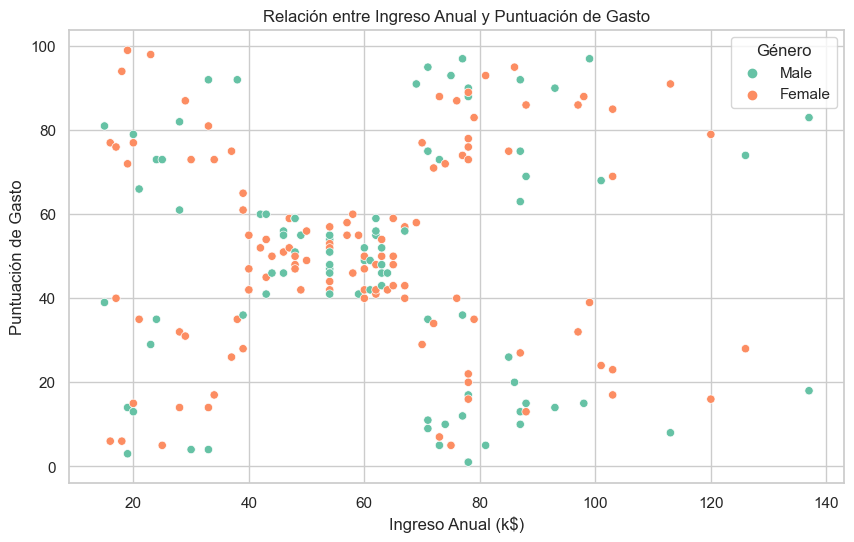

In [7]:
# Relación entre Ingreso Anual y Puntuación de Gasto
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='Set2')
plt.title('Relación entre Ingreso Anual y Puntuación de Gasto')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto')
plt.legend(title='Género')
plt.show()

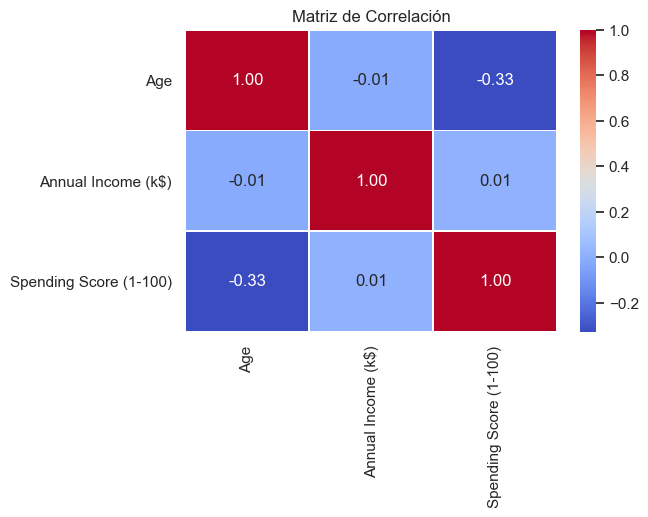

In [8]:
# Matriz de correlación
corr_matrix = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [9]:
# Detección y eliminación de valores atípicos
Q1_income = data['Annual Income (k$)'].quantile(0.25)
Q3_income = data['Annual Income (k$)'].quantile(0.75)
IQR_income = Q3_income - Q1_income
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

In [10]:
data = data[(data['Annual Income (k$)'] >= lower_bound_income) & (data['Annual Income (k$)'] <= upper_bound_income)]

In [11]:
Q1_score = data['Spending Score (1-100)'].quantile(0.25)
Q3_score = data['Spending Score (1-100)'].quantile(0.75)
IQR_score = Q3_score - Q1_score
lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score

In [12]:
data = data[(data['Spending Score (1-100)'] >= lower_bound_score) & (data['Spending Score (1-100)'] <= upper_bound_score)]

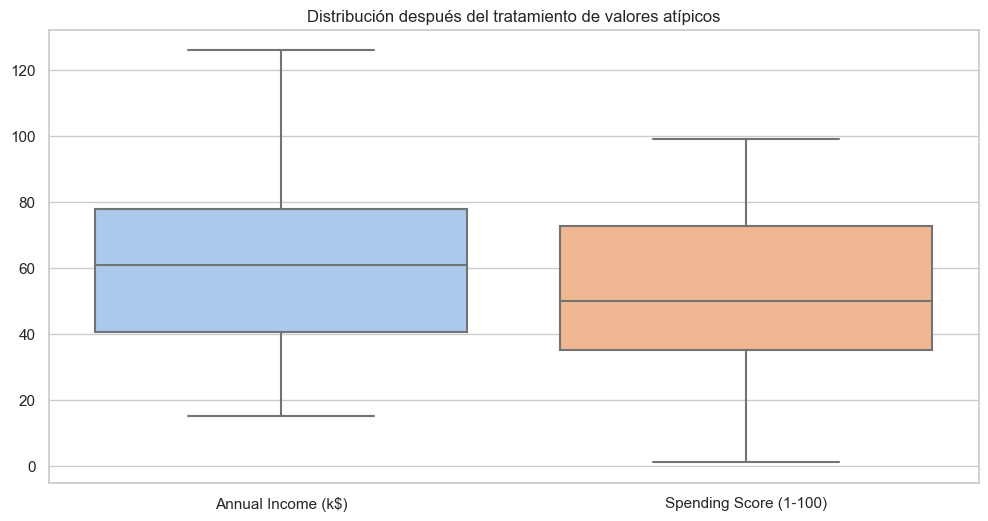

In [13]:
# Confirmar visualmente la eliminación de valores atípicos
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Annual Income (k$)', 'Spending Score (1-100)']])
plt.title('Distribución después del tratamiento de valores atípicos')
plt.show()

In [14]:
# Preprocesamiento de los datos
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [15]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [16]:
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
print("\nDatos escalados - Estadísticas:")
display(scaled_df.describe())


Datos escalados - Estadísticas:


,Age,Annual Income (k$),Spending Score (1-100)
count,1.980000e+02,1.980000e+02,1.980000e+02
mean,1.056955e-16,1.480297e-16,5.326828e-17
std,1.002535e+00,1.002535e+00,1.002535e+00
min,-1.496937e+00,-1.779171e+00,-1.915640e+00
25%,-7.638208e-01,-7.661993e-01,-5.917421e-01
50%,-2.095134e-01,4.815078e-02,-7.669638e-03
75%,7.202926e-01,7.135344e-01,8.781735e-01
max,2.222287e+00,2.630236e+00,1.900300e+00


In [17]:
# Determinación del número óptimo de clusters
silhouette_scores = []
calinski_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, cluster_labels))
    calinski_scores.append(calinski_harabasz_score(scaled_features, cluster_labels))

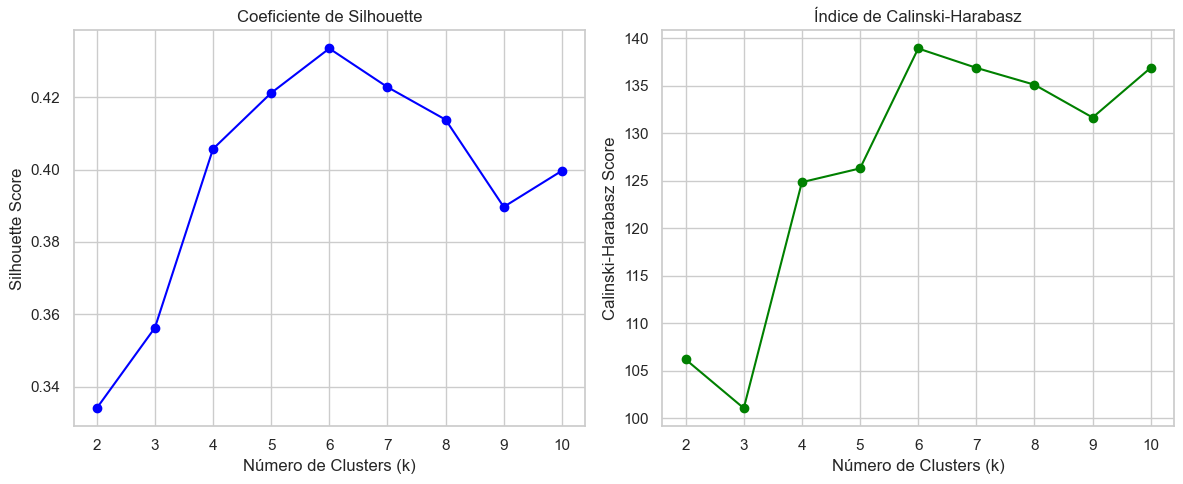

In [18]:
# Visualización de métricas para determinar k óptimo
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='blue')
plt.title('Coeficiente de Silhouette')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(k_values, calinski_scores, marker='o', linestyle='-', color='green')
plt.title('Índice de Calinski-Harabasz')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')

plt.tight_layout()
plt.show()

In [19]:
# Entrenamiento del modelo K-Means
optimal_k = 5
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_optimal.fit_predict(scaled_features)

data['Cluster'] = clusters

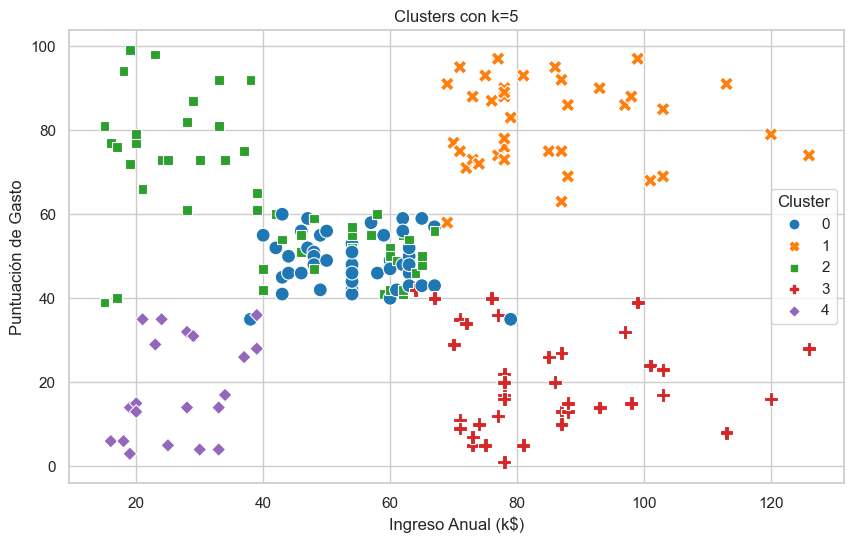

In [20]:
# Visualización de los clusters en 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster', palette='tab10', style='Cluster', s=100)
plt.title(f'Clusters con k={optimal_k}')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto')
plt.legend(title='Cluster')
plt.show()

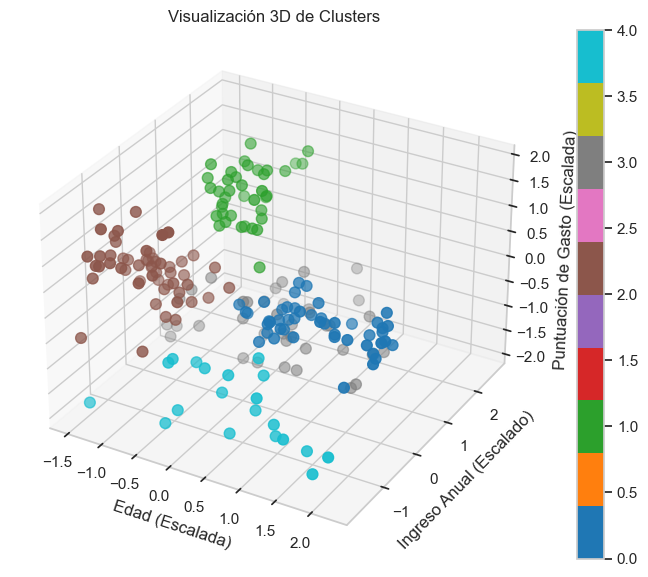

In [21]:
# Visualización 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(scaled_features[:, 0], scaled_features[:, 1], scaled_features[:, 2], 
                c=clusters, cmap='tab10', s=60)
plt.colorbar(sc)
ax.set_title('Visualización 3D de Clusters')
ax.set_xlabel('Edad (Escalada)')
ax.set_ylabel('Ingreso Anual (Escalado)')
ax.set_zlabel('Puntuación de Gasto (Escalada)')
plt.show()

In [22]:
# Evaluación final del modelo
final_silhouette = silhouette_score(scaled_features, clusters)
final_calinski = calinski_harabasz_score(scaled_features, clusters)

print("\nEvaluación del modelo K-Means:")
print("Silhouette Score:", final_silhouette)
print("Calinski-Harabasz Score:", final_calinski)


Evaluación del modelo K-Means:
Silhouette Score: 0.4211865917376424
Calinski-Harabasz Score: 126.2872803705773
